# Animating a Waving U.S. Flag Using Python

Learn more about Flag of the United States: https://en.wikipedia.org/wiki/Flag_of_the_United_States

### Sumudu Tennakoon
<hr>

## Introduction

By the end of this tutorial, learners will be able to:

* Use matplotlib and numpy to create and manipulate polygonal shapes
* Apply sine wave functions to simulate smooth animation
* Understand how to animate visual elements using FuncAnimation
* Create layered, synchronized graphics using zorder
* Strengthen Python fundamentals (loops, functions, numpy array operations, plot)

## Step 1: Settingup Coding Environment

### Local Computer Setup
* VSCode or similar IDE for Python (https://code.visualstudio.com)
* Python >= 3.12 (https://www.python.org/downloads)

### Cloud Alternative: 
* Google Colab Notebook (https://colab.research.google.com)

### Python Libraries
* matlotlib (visualization), numpy (numerical computing) 
```bash
pip install matplotlib numpy
```




In [1]:
# Import Required Libraries
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # plot canvas and functions
from matplotlib.patches import Polygon, Rectangle # add shapes to the image
import matplotlib.animation as animation # used later in the animation step

## Step 2: Drawing the Static Flag

* Break down the flag into visual components
* Use polygons to build stripes and the canton

#### Tasks:
1. Initialize the canvas using `plt.subplots()`
2. Add 13 horizontal stripes with alternating colors
3. Use a `for` loop to add `Polygon` shapes
4. Add the blue canton




In [2]:
# Flag design parameters
num_stripes = 13
stripe_height = 1 / num_stripes          # Even vertical division
canton_height = 7 * stripe_height        # Canton covers 7 stripes
canton_width = 0.4                       # Roughly 2/5 of flag width
rows, cols = 9, 11                       # Star rows & columns

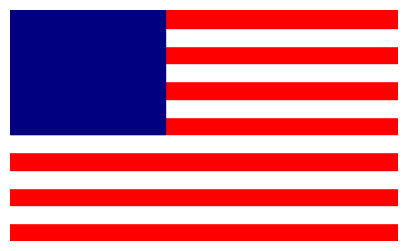

In [3]:
# Set up the canvas
fig, ax = plt.subplots(figsize=(5, 3)) # 3′ × 5′ flag
ax.set_xlim(0, 1)      # X-axis range from 0 to 1
ax.set_ylim(0, 1)      # Y-axis range from 0 to 1
ax.axis('off')         # Hide axes, we just want the flag

# Create Stripes
stripes = []
for i in range(num_stripes):
    color = 'red' if i % 2 == 0 else 'white' # Alternate red and while color when painting stripes
    stripe_start_coordinates = (0, i * stripe_height) # taking bottom left of teh canvas as (0,0)
    stripe = Rectangle(xy=stripe_start_coordinates, width=1, height=stripe_height, color=color)
    ax.add_patch(stripe)
    stripes.append(stripe)

# Create Canton
canton_start_coordinates = (0, 1 - canton_height) # taking bottom left of teh canvas as (0,0)
canton = Rectangle(xy=canton_start_coordinates, width=canton_width, height=canton_height, color='navy')
ax.add_patch(canton)

#plt.show()

## Step 3: Drawing Stars

* Understand basic geometry (polar to Cartesian)
* Practice creating reusable functions
* Use nested loops


#### Tasks:
1. Write `create_star()` function
2. Place stars in a staggered grid

In [4]:
# New Flag design parameter
star_size = 0.012                       # Star radius

In [5]:
# Helper function to draw a 5-pointed star
def create_star(x_center, y_center, size):
    """
    Creates a 5-pointed star centered at (x_center, y_center).
    Returns a matplotlib Polygon object.
    """
    angles = np.linspace(0, 2 * np.pi, 11)  # 10 points (outer and inner), +1 to close the shape
    radius = np.array([size, size * 0.4] * 5 + [size])  # Alternate outer/inner radii
    # Convert polar coordinates to Cartesian (x, y)
    x = x_center + radius * np.cos(angles + np.pi / 2)
    y = y_center + radius * np.sin(angles + np.pi / 2)
    return Polygon(np.column_stack([x, y]), closed=True, color='white', zorder=4)

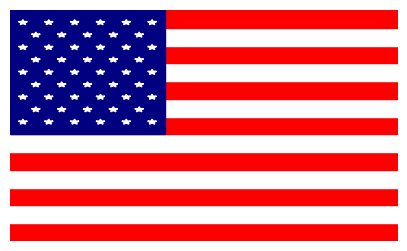

In [6]:
# Set up the canvas
fig, ax = plt.subplots(figsize=(5, 3)) # 3′ × 5′ flag
ax.set_xlim(0, 1)      # X-axis range from 0 to 1
ax.set_ylim(0, 1)      # Y-axis range from 0 to 1
ax.axis('off')         # Hide axes, we just want the flag

# Create Stripes
stripes = []
for i in range(num_stripes):
    color = 'red' if i % 2 == 0 else 'white' # Alternate red and while color when painting stripes
    stripe_start_coordinates = (0, i * stripe_height) # taking bottom left of teh canvas as (0,0)
    stripe = Rectangle(xy=stripe_start_coordinates, width=1, height=stripe_height, color=color)
    ax.add_patch(stripe)
    stripes.append(stripe)

# Create Canton
canton_start_coordinates = (0, 1 - canton_height) # taking bottom left of teh canvas as (0,0)
canton = Rectangle(xy=canton_start_coordinates, width=canton_width, height=canton_height, color='navy')
ax.add_patch(canton)

#------------------------------------------------------------------------------
# New Code: Create stars and store their base positions
#------------------------------------------------------------------------------
stars = []
for row in range(rows):
    for col in range(cols):
        if (row + col) % 2 == 0:  # Checkerboard pattern to match U.S. flag spec
            x = canton_width * (col + 1) / (cols + 1)
            y = 1 - canton_height * (row + 1) / (rows + 1)
            star = create_star(x, y, star_size)
            ax.add_patch(star)
            stars.append((star, x, y))  # Store shape and original position
#------------------------------------------------------------------------------

### Convert Rectagles to Polygons (for animation)

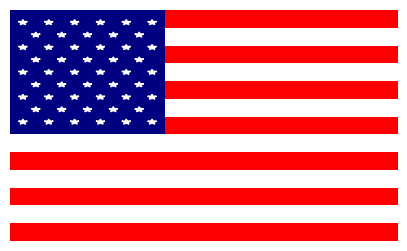

In [ ]:
# Set up the canvas
fig, ax = plt.subplots(figsize=(5, 3)) # Propotioan to 3′ × 5′ flag
ax.set_xlim(0, 1)      # X-axis range from 0 to 1
ax.set_ylim(0, 1)      # Y-axis range from 0 to 1
ax.axis('off')         # Hide axes, we just want the flag

#------------------------------------------------------------------------------
# Modified Code: Create Stripes as Polygons 
#------------------------------------------------------------------------------
stripes = []
for i in range(num_stripes):
    color = 'red' if i % 2 == 0 else 'white'
    y0 = i * stripe_height
    y1 = y0 + stripe_height

    # Four corners of the stripe
    coords = [(0, y0), (1, y0), (1, y1), (0, y1)]
    stripe = Polygon(coords, closed=True, facecolor=color, edgecolor='none')
    ax.add_patch(stripe)
    stripes.append(stripe)

# Create Canton as Polygon
y0 = 1 - canton_height
y1 = 1
x0 = 0
x1 = canton_width

# Four corners of the canton
canton_coords = [(x0, y0), (x1, y0), (x1, y1), (x0, y1)] 
canton = Polygon(canton_coords, closed=True, facecolor='navy', edgecolor='none')
ax.add_patch(canton)
#------------------------------------------------------------------------------

# Create stars and store their base positions
stars = []
for row in range(rows):
    for col in range(cols):
        if (row + col) % 2 == 0:  # Checkerboard pattern to match U.S. flag spec
            x = canton_width * (col + 1) / (cols + 1)
            y = 1 - canton_height * (row + 1) / (rows + 1)
            star = create_star(x, y, star_size)
            ax.add_patch(star)
            stars.append((star, x, y))  # Store shape and original position

## Task 4: Static Waving Flag

* Understand sine waves and visual represetations of amplitude, frequency, and phase
* Apply sine ways to shapes

### Sine wave 

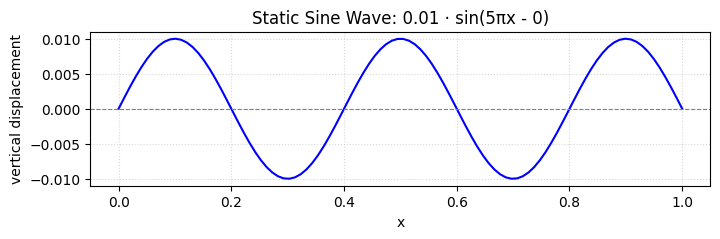

In [8]:
# Generate x-values for the grid
x_grid = np.linspace(0, 1, 100)

# Define phase
phase = 0  # Feel free to try other values like np.pi/2, np.pi, etc.

# Define amplitude
amplitude = 0.01

frequency = 5

# Compute sine wave
y_wave = amplitude * np.sin(frequency * np.pi * x_grid - phase)

# Plot
plt.figure(figsize=(8, 2))
plt.plot(x_grid, y_wave, color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title(f"Static Sine Wave: {amplitude} · sin({frequency}πx - {phase})")
plt.xlabel("x")
plt.ylabel("vertical displacement")
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

### Flag Design

In [9]:
# New Flag design parameter for wavy flag
x_res = 100  # Horizontal resolution of sine wave for waving

In [10]:
# Create horizontal base grid for wave shape
x_grid = np.linspace(0, 1, x_res)
wave = 0.01 * np.sin(2 * np.pi * x_grid * 2)  # Sine wave shape

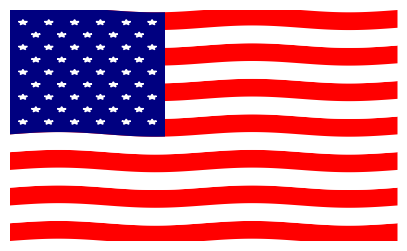

In [ ]:
# Set up the canvas
fig, ax = plt.subplots(figsize=(5, 3)) # Propotioan to 3′ × 5′ flag
ax.set_xlim(0, 1)      # X-axis range from 0 to 1
ax.set_ylim(0, 1)      # Y-axis range from 0 to 1
ax.axis('off')         # Hide axes, we just want the flag


# Create Stripes as Polygons 
stripes = []
for i in range(num_stripes):
    color = 'red' if i % 2 == 0 else 'white'

    #------------------------------------------------------------------------------
    # Modified Code: Make Polygons coorinates transform with sine wave
    #------------------------------------------------------------------------------
    y_base = i * stripe_height
    y0 = y_base + wave
    y1 = y0 + stripe_height

    # Build polygon by combining bottom and top edges
    x_full = np.concatenate([x_grid, x_grid[::-1]]) #x_grid[::-1] is the same values of x_grid reversed, for the bottom edge
    y_full = np.concatenate([y0, y1[::-1]]) #y1[::-1] is the same values of y1 reversed, for the bottom edge

    coordinates = np.column_stack([x_full, y_full]) # pair (x,y) coordinates form two arrays
    stripe = Polygon(xy=coordinates, closed=True, facecolor=color, edgecolor='none')
    #------------------------------------------------------------------------------
    ax.add_patch(stripe)
    stripes.append(stripe)

# Draw Wavy Canton as Polygon
x_canton = np.linspace(0, canton_width, x_res)

#------------------------------------------------------------------------------
# Modified Code: Make Polygons coorinates transform with sine wave
#------------------------------------------------------------------------------
wave_canton = 0.01 * np.sin(2 * np.pi * x_canton * 2)
y0_canton = 1 - canton_height + wave_canton
y1_canton = 1 + wave_canton

x_canton_full = np.concatenate([x_canton, x_canton[::-1]]) #x_canton[::-1] is the same values of x_canton reversed, for the bottom edge
y_full_canton = np.concatenate([y0_canton, y1_canton[::-1]]) #y1_canton[::-1] is the same values of y1_canton reversed, for the top edge

coordinates = np.column_stack([x_canton_full, y_full_canton]) # pair (x,y) coordinates form two arrays
canton_poly = Polygon(xy=coordinates, closed=True, facecolor='navy', edgecolor='none', zorder=2)
#------------------------------------------------------------------------------

ax.add_patch(canton_poly)

# Create stars and store their base positions
stars = []
for row in range(rows):
    for col in range(cols):
        if (row + col) % 2 == 0:  # Checkerboard pattern to match U.S. flag spec
            x = canton_width * (col + 1) / (cols + 1)
            y = 1 - canton_height * (row + 1) / (rows + 1)
            star = create_star(x, y, star_size)
            ax.add_patch(star)
            stars.append(star)  # Store shape and original position

## Task 5: Add Wave Animation to Flag

* Apply sinewave motion to shapes

Tasks
1. Create `sine_wave_generator()` function
2. Create the `animate()` function
3. Call `FuncAnimation()` with frame settings
4. Display the animation with `plt.show()`
5. Play Flag Animation on the Notebook with `.to_jshtml()` function
6. Save Animation to .gif file


### Flag Animation Design

In [12]:
# New Flag design parameter for animation
frame_count = 100                        # Total frames in animation

### Functions

In [13]:
# Sine wave generator (used by stripes and canton)
def sine_wave_generator(x_grid, phase):
    """
    Returns a sine wave across the flag for the given animation phase.
    Simulates horizontal wind motion.
    """
    return 0.01 * np.sin(5 * np.pi * x_grid - phase)

In [14]:
#  Animation function: called each frame 
def animate(frame):
    phase = 0.1 * frame  # Controls horizontal motion of the wave
    wave = sine_wave_generator(x_grid, phase)

    # Update each stripe’s y-coordinates with the shared wave
    for i, poly in enumerate(stripes):
        y_base = i * stripe_height
        y_bottom = y_base + wave
        y_top = y_base + stripe_height + wave

        x_full = np.concatenate([x_grid, x_grid[::-1]])
        y_full = np.concatenate([y_bottom, y_top[::-1]])
        poly.set_xy(np.column_stack([x_full, y_full]))

    # Update canton using same shared wave (cropped to its width)
    wave_canton = sine_wave_generator(x_canton, phase)
    y_bottom = (1 - canton_height) + wave_canton
    y_top = 1 + wave_canton
    y_canton = np.concatenate([y_bottom, y_top[::-1]])
    canton_poly.set_xy(np.column_stack([x_canton_full, y_canton]))

    # Slightly wave the stars using sine/cosine for shimmer
    for star, base_x, base_y in stars:
        dx = 0.003 * np.sin(2 * np.pi * base_y - phase)
        dy = 0.003 * np.cos(2 * np.pi * base_x - phase)
        updated_star = create_star(base_x + dx, base_y + dy, star_size)
        star.set_xy(updated_star.get_xy())

### Bringing All togetehr to create Code for Flag Animation

In [15]:
# Helper function to draw a 5-pointed star
def create_star(x_center, y_center, size):
    """
    Creates a 5-pointed star centered at (x_center, y_center).
    Returns a matplotlib Polygon object.
    """
    angles = np.linspace(0, 2 * np.pi, 11)  # 10 points (outer and inner), +1 to close the shape
    radius = np.array([size, size * 0.4] * 5 + [size])  # Alternate outer/inner radii
    # Convert polar coordinates to Cartesian (x, y)
    x = x_center + radius * np.cos(angles + np.pi / 2)
    y = y_center + radius * np.sin(angles + np.pi / 2)
    return Polygon(np.column_stack([x, y]), closed=True, color='white', zorder=4)

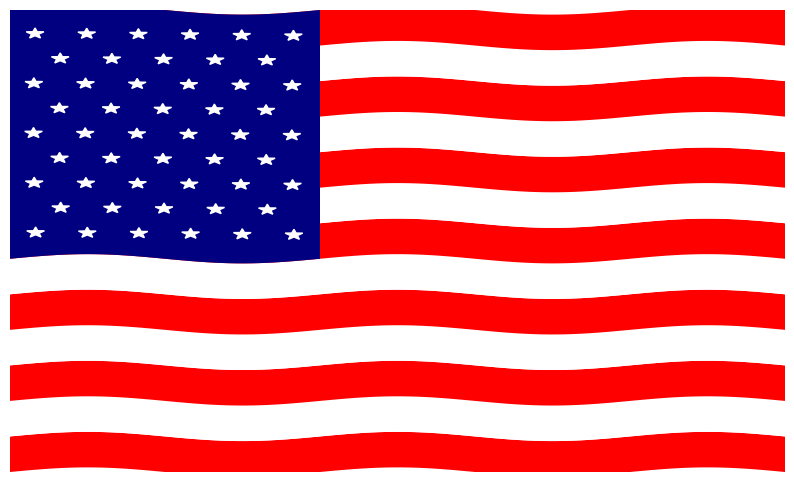

In [ ]:
# Import Required Libraries
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # plot canvas and functions
from matplotlib.patches import Polygon # add shapes to the image
import matplotlib.animation as animation # used later in the animation step

# Flag design parameters
num_stripes = 13
stripe_height = 1 / num_stripes          # Even vertical division
canton_height = 7 * stripe_height        # Canton covers 7 stripes
canton_width = 0.4                       # Roughly 2/5 of flag width
rows, cols = 9, 11                       # Star rows & columns
star_size = 0.012                        # Star radius

x_res = 100  # Horizontal resolution of sine wave for waving
frame_count = 100                        # Total frames in animation

# Create horizontal base grid for wave shape
x_grid = np.linspace(0, 1, x_res)
wave = 0.01 * np.sin(2 * np.pi * x_grid * 2)  # Sine wave shape

# Set up the canvas
fig, ax = plt.subplots(figsize=(10, 6)) # Propotioan to 3′ × 5′ flag
ax.set_xlim(0, 1)      # X-axis range from 0 to 1
ax.set_ylim(0, 1)      # Y-axis range from 0 to 1
ax.axis('off')         # Hide axes, we just want the flag

# Create Stripes as Polygons 
stripes = []
for i in range(num_stripes):
    color = 'red' if i % 2 == 0 else 'white'

    # Construct top and bottom edges using initial flat wave (zero displacement)
    y_base = i * stripe_height
    x_full = np.concatenate([x_grid, x_grid[::-1]])  # Forward and reversed for top edge
    y_flat = np.concatenate([
        np.full_like(x_grid, y_base),                # Bottom edge of stripe. Creates a new array that has the same shape as x_grid but with value y_base
        np.full_like(x_grid, y_base + stripe_height)[::-1]  # Top edge, reversed, Creates a new array that has the same shape as x_grid but with value y_base + stripe_height
    ])

    coordinates = np.column_stack([x_full, y_flat]) # pair (x,y) coordinates form two arrays
    stripe = Polygon(xy=coordinates, closed=True,
                     facecolor=color, edgecolor='none', zorder=1)
    ax.add_patch(stripe)
    stripes.append(stripe)

# Draw  waving canton polygon (blue background for stars)
x_canton = np.linspace(0, canton_width, x_res) # array of evenly spaced horizontal points across the width of the canton.
x_canton_full = np.concatenate([x_canton, x_canton[::-1]])
y_canton_flat = np.concatenate([
    np.full_like(x_canton, 1 - canton_height),   # Bottom of canton. Creates a new array that has the same shape as x_canton but with value 1 - canton_height
    np.full_like(x_canton, 1)[::-1]              # Top of canton, reversed. Creates a new array that has the same shape as x_canton but with value 1
])

coordinates = np.column_stack([x_canton_full, y_canton_flat]) # pair (x,y) coordinates form two arrays
canton_poly = Polygon(xy=coordinates, closed=True, facecolor='navy', edgecolor='none', zorder=2)
ax.add_patch(canton_poly)

# Create stars and store their base positions
stars = []
for row in range(rows):
    for col in range(cols):
        if (row + col) % 2 == 0:  # Checkerboard pattern to match U.S. flag spec
            x = canton_width * (col + 1) / (cols + 1)
            y = 1 - canton_height * (row + 1) / (rows + 1)
            star = create_star(x, y, star_size)
            ax.add_patch(star)
            stars.append((star, x, y))  # Store shape and original position

# Create Animation
ani = animation.FuncAnimation(fig, animate, frames=frame_count, interval=50)

#plt.show()

## Play Wavy Flag Animation 

In [17]:
from IPython.display import HTML

ani = animation.FuncAnimation(fig, animate, frames=100, interval=50)
HTML(ani.to_jshtml())

In [18]:
# Save Animation
ani.save('us_flag.gif', writer='pillow', fps=20)

<hr/>
Last update 2025-07-04 by Sumudu Tennakoon

*This project was developed from the author's original concept, with creative assistance from Microsoft Copilot, to support educational exploration and code assiatnce to create the Python code for visual ourput.*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.